Javier Alemán Rodríguez

# Clasificación de la calidad de vinos (vinos rojos)

## Extracción y transformación de datos

### Importación de librerías

Instalar las librerías que sean necesarias

In [ ]:
!pip install joblib

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import joblib
from sklearn import preprocessing
import warnings

### Importación del dataset

In [2]:
url = 'https://raw.githubusercontent.com/JaviARo/Datasets/main/Wine_quality'

wine_quality = pd.read_csv(f'{url}/winequality-red.csv', sep=';')

In [3]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Separamos variables de entrada y variable objetivo

In [4]:
X = wine_quality.drop(["quality"], axis=1)
y = wine_quality["quality"]

### Escalamiento de datos

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=X.columns)

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


### Separación de datos de entrenamiento y test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Selección de características

### Matriz de correlación

<Axes: >

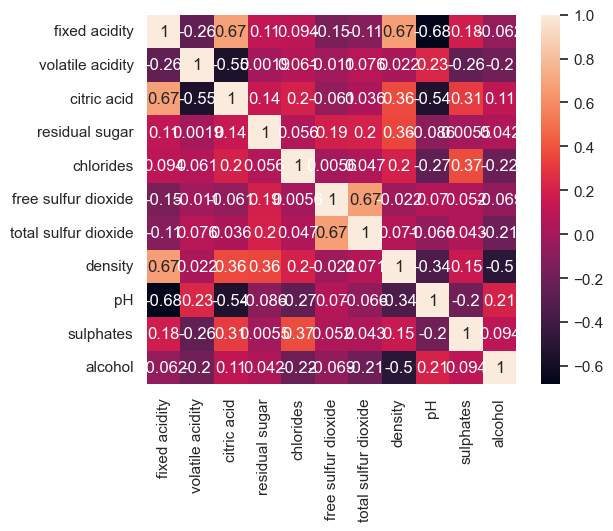

In [8]:
sns.set()
sns.heatmap(X.corr(), square=True, annot=True)

### SelectKBest

In [9]:
def ApplySelectKBest(X_train, X_test, y_train, k):
	selector = SelectKBest(f_regression, k=k)

	selector.fit_transform(X_train, y_train)
	selector.transform(X_test)

	print(f"Mejores {k} columnas = [")
	for col in selector.get_feature_names_out():
		print(f"  \'{col}\'")
	print("]\n")

In [10]:
ApplySelectKBest(X_train, X_test, y_train, 5)
ApplySelectKBest(X_train, X_test, y_train, 6)

Mejores 5 columnas = [
  'volatile acidity'
  'citric acid'
  'density'
  'sulphates'
  'alcohol'
]

Mejores 6 columnas = [
  'volatile acidity'
  'citric acid'
  'total sulfur dioxide'
  'density'
  'sulphates'
  'alcohol'
]



### Quitamos características

Quitamos las siguientes columnas:
* "fixed acidity": Tiene una fuerte correlación positiva con las columnas de "citrid acid" y "density", las cuales tienen una relevancia mayor en el dataset según SelectKBest.
* "free sulfur dioxide": Tiene una fuerte correlación positiva con la columna de "total sulfur dioxide", la cuale tiene una relevancia mayor en el dataset según SelectKBest.

In [11]:
X = X.drop(columns=["fixed acidity", "free sulfur dioxide"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Modelos de árboles
### Función para aplicar validación cruzada

In [26]:
cv = KFold(n_splits = 5, shuffle = True, random_state=42) # shuffle = False si hay dimensión temporal

In [27]:
def cross_validation(clf, cv, X_train, y_train):
	fold_accuracy = []
	for train_fold, test_fold in cv.split(X_train):
		# División train test aleatoria
		f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
		f_train_y = y_train.iloc[train_fold]
		# entrenamiento y ejeución del modelo
		clf.fit(f_train_x, f_train_y)
		# Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
		y_pred = clf.predict(X_train.iloc[test_fold])
		# evaluación del modelo
		acc = accuracy_score(y_train.iloc[test_fold], y_pred)
		fold_accuracy.append(acc)
	return sum(fold_accuracy)/len(fold_accuracy)

### Árbol de decisión - Clasificación

In [28]:
for i in range(1, 20):
  tree = DecisionTreeClassifier(max_depth = i, random_state = 1)
  score = cross_validation(tree, cv, X_train, y_train)
  print("Profundidad del árbol: %i - Precisión: %f" % (i, score))

Profundidad del árbol: 1 - Precisión: 0.541808
Profundidad del árbol: 2 - Precisión: 0.524620
Profundidad del árbol: 3 - Precisión: 0.526982
Profundidad del árbol: 4 - Precisión: 0.554329
Profundidad del árbol: 5 - Precisión: 0.544167
Profundidad del árbol: 6 - Precisión: 0.562120
Profundidad del árbol: 7 - Precisión: 0.573094
Profundidad del árbol: 8 - Precisión: 0.567632
Profundidad del árbol: 9 - Precisión: 0.591100
Profundidad del árbol: 10 - Precisión: 0.591094
Profundidad del árbol: 11 - Precisión: 0.588747
Profundidad del árbol: 12 - Precisión: 0.595787
Profundidad del árbol: 13 - Precisión: 0.593441
Profundidad del árbol: 14 - Precisión: 0.590309
Profundidad del árbol: 15 - Precisión: 0.590313
Profundidad del árbol: 16 - Precisión: 0.585622
Profundidad del árbol: 17 - Precisión: 0.592653
Profundidad del árbol: 18 - Precisión: 0.593425
Profundidad del árbol: 19 - Precisión: 0.592644


### Árbol de decisión - Regresión

In [29]:
for i in range(1, 20):
  tree = DecisionTreeRegressor(max_depth = i, random_state = 1)
  score = cross_val_score(tree, X, y, cv=5)
  score = score.mean()
  print("Profundidad del árbol: %i - Precisión: %f" % (i, score))

Profundidad del árbol: 1 - Precisión: 0.104046
Profundidad del árbol: 2 - Precisión: 0.146991
Profundidad del árbol: 3 - Precisión: 0.211347
Profundidad del árbol: 4 - Precisión: 0.200241
Profundidad del árbol: 5 - Precisión: 0.188640
Profundidad del árbol: 6 - Precisión: 0.140388
Profundidad del árbol: 7 - Precisión: 0.086344
Profundidad del árbol: 8 - Precisión: -0.007920
Profundidad del árbol: 9 - Precisión: -0.106899
Profundidad del árbol: 10 - Precisión: -0.143512
Profundidad del árbol: 11 - Precisión: -0.251450
Profundidad del árbol: 12 - Precisión: -0.265986
Profundidad del árbol: 13 - Precisión: -0.316877
Profundidad del árbol: 14 - Precisión: -0.328435
Profundidad del árbol: 15 - Precisión: -0.305954
Profundidad del árbol: 16 - Precisión: -0.280651
Profundidad del árbol: 17 - Precisión: -0.374578
Profundidad del árbol: 18 - Precisión: -0.366759
Profundidad del árbol: 19 - Precisión: -0.381348


### Clasificador Bagging

In [30]:
warnings.filterwarnings("ignore", category=FutureWarning)

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bgclassifier = BaggingClassifier(
  base_estimator=pipeline, 
  n_estimators=100,
  max_features=9,
  max_samples=100,
  random_state=1, n_jobs=5
)

score = cross_validation(bgclassifier, cv, X_train, y_train)
score = score.mean()
print('Precisión: %f, ' %score)

Precisión: 0.585567, 


### Clasificadores RandomForest, AdaBoost y GradientBoosting

In [31]:
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

for estimators in l_estimators:
	print("------ Número de estimadores: %i ------" %estimators)
	classifiers = []
	classifiers.append(RandomForestClassifier(n_estimators= estimators, criterion='gini', random_state=0))
	classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4, criterion='gini'), n_estimators=estimators, random_state=0))
	classifiers.append(GradientBoostingClassifier(n_estimators=estimators, learning_rate=0.25, random_state=0, loss='log_loss'))
	for clf in classifiers:
		class_name = str(clf)
		score = cross_validation(clf, cv, X_train, y_train)
		print("Clasificador %s: %f" % (class_name[:class_name.find("(")], score))

------ Número de estimadores: 2 ------
Clasificador RandomForestClassifier: 0.563735
Clasificador AdaBoostClassifier: 0.531624
Clasificador GradientBoostingClassifier: 0.558992
------ Número de estimadores: 4 ------
Clasificador RandomForestClassifier: 0.618459
Clasificador AdaBoostClassifier: 0.483958
Clasificador GradientBoostingClassifier: 0.577779
------ Número de estimadores: 8 ------
Clasificador RandomForestClassifier: 0.633312
Clasificador AdaBoostClassifier: 0.493333
Clasificador GradientBoostingClassifier: 0.592613
------ Número de estimadores: 16 ------
Clasificador RandomForestClassifier: 0.653615
Clasificador AdaBoostClassifier: 0.510518
Clasificador GradientBoostingClassifier: 0.609831
------ Número de estimadores: 32 ------
Clasificador RandomForestClassifier: 0.660674
Clasificador AdaBoostClassifier: 0.563695
Clasificador GradientBoostingClassifier: 0.618422
------ Número de estimadores: 64 ------
Clasificador RandomForestClassifier: 0.659081
Clasificador AdaBoostClassi

## Modelo elegido

In [44]:
classifier = RandomForestClassifier(n_estimators= 1024, criterion='gini', random_state=0)

print(f"Precisión: {cross_validation(classifier, cv, X_train, y_train)}")

Precisión: 0.6731372549019607


### Matriz de confusión con los datos de test

In [39]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Metrics 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.72      0.81      0.76       140
           6       0.69      0.72      0.70       134
           7       0.57      0.40      0.47        30
           8       1.00      0.50      0.67         2

    accuracy                           0.69       320
   macro avg       0.50      0.40      0.43       320
weighted avg       0.66      0.69      0.67       320

Normalized confusion matrix
[[0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.69230769 0.30769231 0.         0.        ]
 [0.         0.         0.80714286 0.17857143 0.01428571 0.        ]
 [0.         0.         0.23880597 0.71641791 0.04477612 0.        ]
 [0.         0.         0.1        0.5        0.4        0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]]


c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\redbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

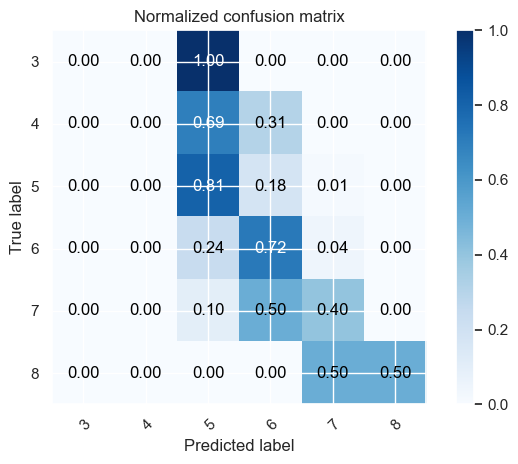

In [45]:
y_pred = classifier.predict(X_test)
plot_confusion_matrix(y_test, y_pred, classes = unique_labels(y_test, y_pred), normalize=True)

### Exportación del modelo

In [46]:
joblib.dump(clf,'Act_3_5_modelo_vinos_rojos.pkl')

['Act_3_5_modelo_vinos_rojos.pkl']

### Comparación precisión variable con modelo importado

In [47]:
print(f"Precisión con los datos de test: {classifier.score(X_test, y_test)}")
print(f"Precisión con todo el dataset: {classifier.score(X, y)}")

Precisión con los datos de test: 0.69375
Precisión con todo el dataset: 0.8774233896185115


### Importación del modelo

In [48]:
clf_entrenado = joblib.load('Act_3_5_modelo_vinos_rojos.pkl')
print(f"Precisión con los datos de test: {clf_entrenado.score(X_test, y_test)}")
print(f"Precisión con todo el dataset: {clf_entrenado.score(X, y)}")

Precisión con los datos de test: 0.653125
Precisión con todo el dataset: 0.8674171357098186


### Matriz de confusión

Metrics 
              precision    recall  f1-score   support

           3       0.86      0.60      0.71        10
           4       0.87      0.64      0.74        53
           5       0.88      0.91      0.90       681
           6       0.86      0.86      0.86       638
           7       0.85      0.83      0.84       199
           8       0.93      0.78      0.85        18

    accuracy                           0.87      1599
   macro avg       0.87      0.77      0.81      1599
weighted avg       0.87      0.87      0.87      1599

Normalized confusion matrix
[[0.6        0.2        0.2        0.         0.         0.        ]
 [0.01886792 0.64150943 0.18867925 0.1509434  0.         0.        ]
 [0.         0.00293686 0.9133627  0.07929515 0.00440529 0.        ]
 [0.         0.         0.10501567 0.85579937 0.03761755 0.0015674 ]
 [0.         0.00502513 0.0201005  0.14572864 0.82914573 0.        ]
 [0.         0.         0.         0.05555556 0.16666667 0.77777778]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

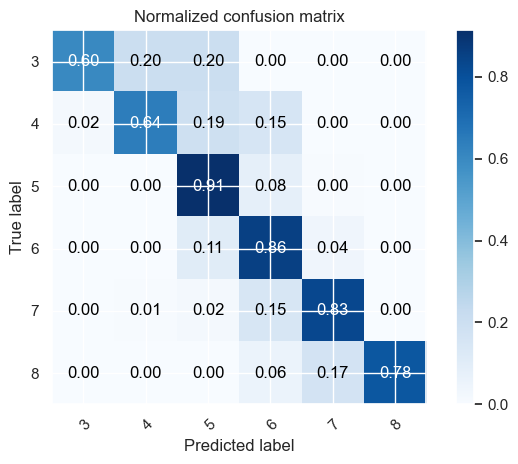

In [41]:
y_pred = clf_entrenado.predict(X)
plot_confusion_matrix(y, y_pred, classes = unique_labels(y_test, y_pred), normalize=True)